In [1]:
## Commencer par GUIT, inserer le repertoire sur guithub
## Mettre en place, un guit 
## Commencer par l'analyse exploratoire 
## entrainer le model de classification, 
## Mettre en place L'api ( Guit GUITHUB)
## Utiliser l'api

In [1]:
## Manipulation des données
import numpy as np
import pandas as pd

## Bibliotheques graphiques
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [2]:
def remove_column_nul(df,rate):
    cols_vides = [col for col in df.columns if df[col].isna().mean()>rate] #0.5
    df.drop(cols_vides, axis=1, inplace=True)
    plt.figure(figsize=(20,10))
    sns.heatmap(df.isna(),cbar=False)

In [3]:
def remove_column(df,columns):
    df.drop(labels=columns,axis=1, inplace= True)

In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
def graph_objet(df,X,Y,title):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10,6))
    sns.barplot(x = df.groupby([X]).count().sort_values(by=Y, 
                ascending=False)[Y].head(10).values,
                y = df.groupby([X]).count().sort_values(by=Y,
                ascending=False)[Y].head(10).index)
    plt.title(title)

In [6]:
def bar_plot(df,X,title):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10,6))
    sns.barplot(x = df[X].value_counts(ascending=False).values,
                y = df[X].value_counts(ascending=False).index)
    plt.title(title)

In [7]:
def encoder(df_train,df_test,encoder):
    le_count = 0
    # Iterate through the columns
    for col in df_train:
        if df_train[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(df_train[col].unique())) <= 2:
                # Train on the training data
                encoder.fit(df_train[col])
                # Transform both training and testing data
                df_train[col] = encoder.transform(df_train[col])
                df_test[col] = encoder.transform(df_test[col])

                # Keep track of how many columns were label encoded
                le_count += 1

    print('%d columns were label encoded.' % le_count)
    
    return df_train,df_test

In [8]:
def imputer(df_train,df_test,imputer):
    df_train = imputer.fit_transform(df_train)
    df_test = imputer.transform(df_test)
    return df_train,df_test

## Analyse Exploratoire

In [9]:
df_application_train=pd.read_csv('application_train.csv')
df_application_test=pd.read_csv('application_test.csv')

In [10]:
df_credit_card_balance=pd.read_csv('credit_card_balance.csv')
df_bureau_balance=pd.read_csv('bureau_balance.csv')
df_bureau=pd.read_csv('bureau.csv')
df_installments_payments=pd.read_csv('installments_payments.csv')
df_POS_CASH_balance=pd.read_csv('POS_CASH_balance.csv')
df_previous_application=pd.read_csv('previous_application.csv')
df_sample_submission=pd.read_csv('sample_submission.csv')

In [11]:
df_HomeCredit_columns_description=pd.read_csv('HomeCredit_columns_description.csv',encoding='ISO-8859-1')
df_HomeCredit_columns_description=df_HomeCredit_columns_description.drop(columns='Unnamed: 0')
df_HomeCredit_columns_description.head(5)

,Table,Row,Description,Special
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [12]:
df_application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
df_HomeCredit_columns_description.isnull().mean().sort_values(ascending=False)

Special        0.607306
Table          0.000000
Row            0.000000
Description    0.000000
dtype: float64

In [14]:
df_HomeCredit_columns_description['Table'].value_counts()

application_{train|test}.csv    122
previous_application.csv         38
credit_card_balance.csv          23
bureau.csv                       17
POS_CASH_balance.csv              8
installments_payments.csv         8
bureau_balance.csv                3
Name: Table, dtype: int64

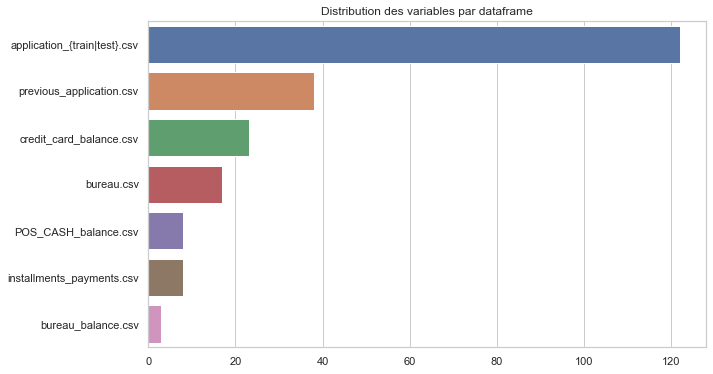

In [15]:
bar_plot(df_HomeCredit_columns_description,'Table','Distribution des variables par dataframe')

In [16]:
df_HomeCredit_columns_description[df_HomeCredit_columns_description['Table']=='application_{train|test}.csv'].head(50)

,Table,Row,Description,Special
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [17]:
df_HomeCredit_columns_description[df_HomeCredit_columns_description['Row']=='TARGET']

,Table,Row,Description,Special
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN


In [18]:
df_HomeCredit_columns_description[df_HomeCredit_columns_description['Row']=='OCCUPATION_TYPE']

,Table,Row,Description,Special
28,application_{train|test}.csv,OCCUPATION_TYPE,What kind of occupation does the client have,NaN


In [19]:
df_HomeCredit_columns_description[df_HomeCredit_columns_description['Row']=='FLAG_OWN_REALTY']

,Table,Row,Description,Special
5,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN


In [20]:
df_HomeCredit_columns_description[df_HomeCredit_columns_description['Row']=='FLAG_OWN_CAR']

,Table,Row,Description,Special
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [21]:
df_HomeCredit_columns_description[df_HomeCredit_columns_description['Row']=='NAME_INCOME_TYPE']

,Table,Row,Description,Special
12,application_{train|test}.csv,NAME_INCOME_TYPE,"Clients income type (businessman, working, mat...",NaN


In [22]:

df_HomeCredit_columns_description[df_HomeCredit_columns_description['Row']=='NAME_TYPE_SUITE']

,Table,Row,Description,Special
11,application_{train|test}.csv,NAME_TYPE_SUITE,Who was accompanying client when he was applyi...,NaN
194,previous_application.csv,NAME_TYPE_SUITE,Who accompanied client when applying for the p...,NaN


On observe bien que le df Aplication train/test, nous apportent beaucpup d'information Dans la suite on analysera plus en profondeur le df train test 

In [23]:
df_application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

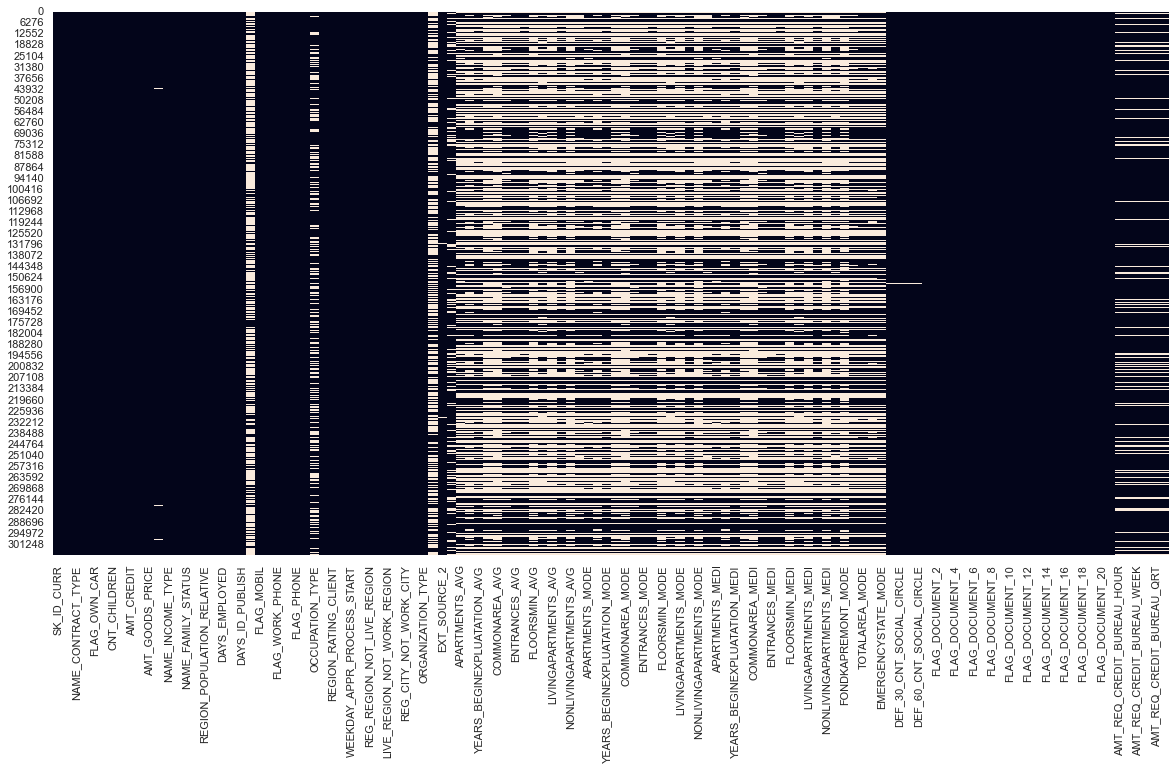

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df_application_train.isna(),cbar=False)

In [25]:
missing_values = missing_values_table(df_application_train)
missing_values.head(50)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [27]:
df_application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Text(0.5, 1.0, 'title')

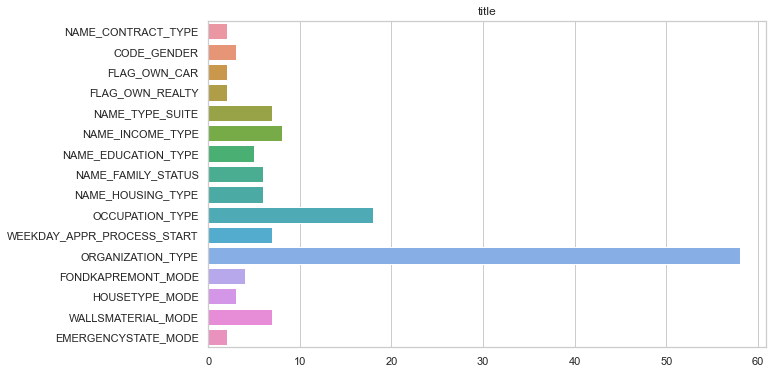

In [28]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x = df_application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).values,
            y = df_application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).index)
plt.title('title')

In [29]:
df_application_train['OCCUPATION_TYPE'].isna().value_counts()

False    211120
True      96391
Name: OCCUPATION_TYPE, dtype: int64

In [31]:
df_application_train['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

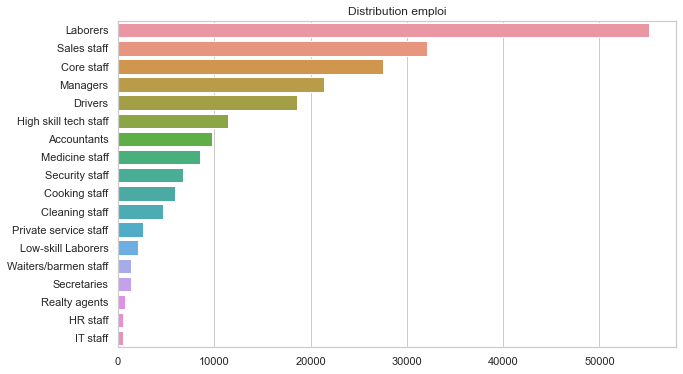

In [32]:
bar_plot(df_application_train,'OCCUPATION_TYPE','Distribution emploi')

In [33]:
df_application_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [34]:
df_application_train,df_application_test=encoder(df_application_train,df_application_test,LabelEncoder())

3 columns were label encoded.


In [35]:
df_application_train = pd.get_dummies(df_application_train)
df_application_test = pd.get_dummies(df_application_test)

In [36]:
train_labels = df_application_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
df_application_train, df_application_test = df_application_train.align(df_application_test, join = 'inner', axis = 1)

# Add the target back in
df_application_train['TARGET'] = train_labels

print('Training Features shape: ', df_application_train.shape)
print('Testing Features shape: ', df_application_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [37]:
## Ajouté dans une nouvelle variable 
df_application_train['Age']=abs(df_application_train['DAYS_BIRTH']/365)

<AxesSubplot:title={'center':'Distribution des clients par age'}, ylabel='Frequency'>

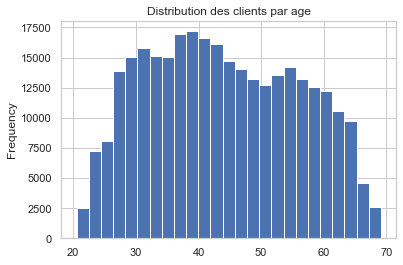

In [38]:
df_application_train['Age'].plot.hist(title = 'Distribution des clients par age',bins=25)

In [39]:
df_application_test['Age']=abs(df_application_test['DAYS_BIRTH']/365)

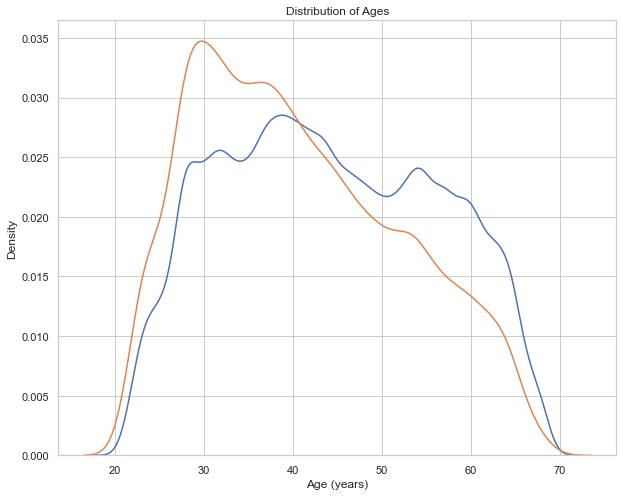

In [40]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_application_train.loc[df_application_train['TARGET'] == 0, 'Age'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_application_train.loc[df_application_train['TARGET'] == 1, 'Age'], label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [41]:
df_application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [42]:
df_application_train['DAYS_EMPLOYED'].isna().value_counts()

False    307511
Name: DAYS_EMPLOYED, dtype: int64

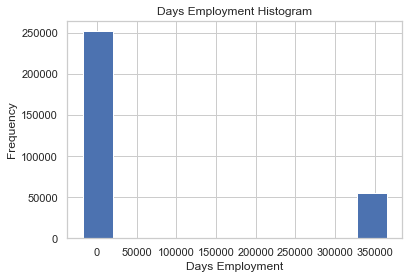

In [44]:
df_application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

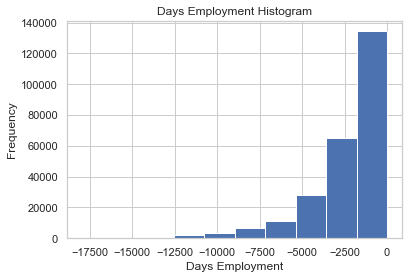

In [45]:
# Create an anomalous flag column
df_application_train['DAYS_EMPLOYED_ANOM'] = df_application_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [46]:
df_application_test['DAYS_EMPLOYED_ANOM'] = df_application_test["DAYS_EMPLOYED"] == 365243
df_application_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [49]:
correlations = df_application_train.corr()['TARGET'].sort_values()

In [50]:
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [51]:
ext_data = df_application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


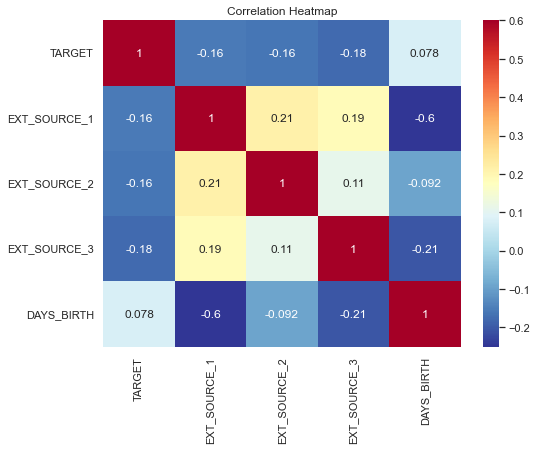

In [52]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

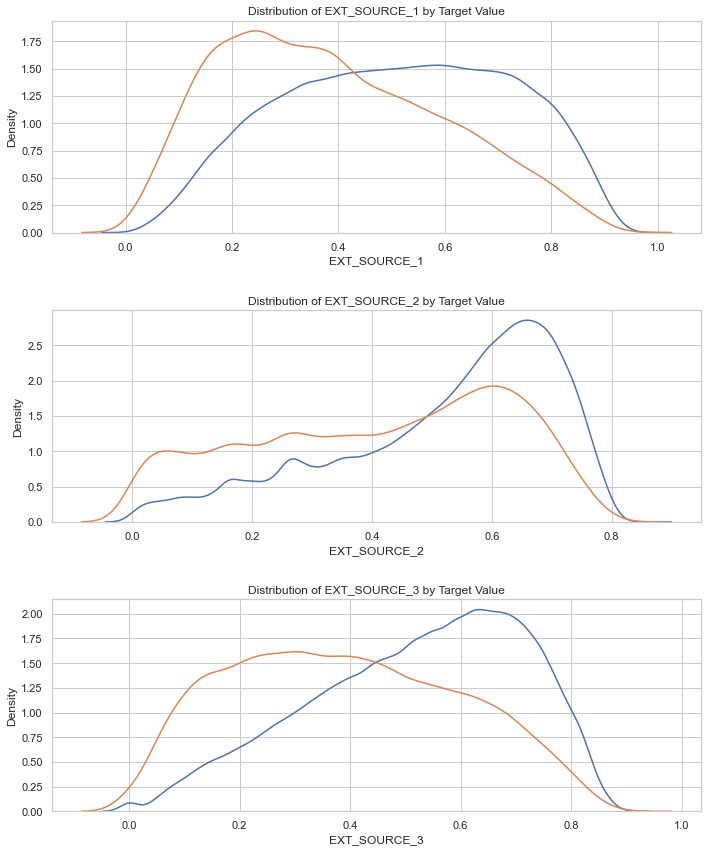

In [53]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_application_train.loc[df_application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_application_train.loc[df_application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

## Feature engineering

In [54]:
poly_features = df_application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = df_application_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [55]:
poly_features.shape

(307511, 5)

In [56]:
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

In [57]:
## On rempli les valeur manquants
poly_features,poly_features_test=imputer(poly_features,poly_features_test,SimpleImputer(strategy = 'median'))

In [58]:
poly_features.shape

(307511, 4)

In [59]:
poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(poly_features)

PolynomialFeatures(degree=3)

In [60]:
poly_features,poly_features_test=imputer(poly_features,poly_features_test,poly_transformer)

In [61]:
poly_features.shape

(307511, 35)

On observe que les nombres des variables representatives ont augmentés  

In [62]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [63]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target

poly_corrs = poly_features.corr()['TARGET'].sort_values()

In [64]:
## 
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['SK_ID_CURR'] = df_application_train['SK_ID_CURR']
app_train_poly = df_application_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

poly_features_test['SK_ID_CURR'] = df_application_test['SK_ID_CURR']
app_test_poly = df_application_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

In [65]:
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

In [66]:
app_train_domain = df_application_train.copy()
app_test_domain = df_application_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

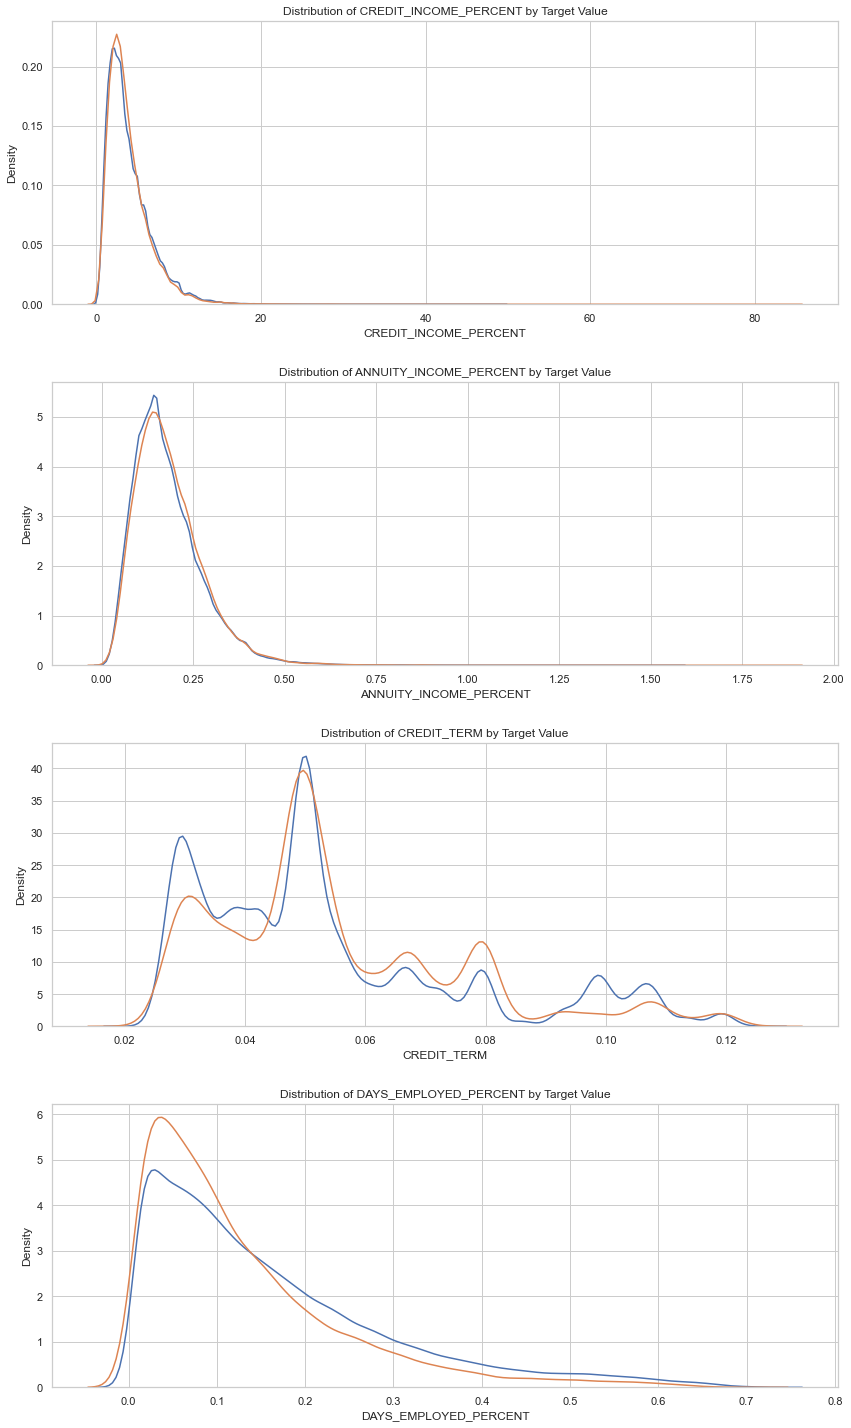

In [67]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [68]:
app_train_poly.to_csv('app_train_poly.csv', index = False)
app_test_poly.to_csv('app_test_poly.csv', index = False)

In [69]:
app_train_domain.to_csv('app_train_domain.csv', index = False)
app_test_domain.to_csv('app_test_domain.csv', index = False)

Realisé analyse exploratoire+ featuring enginearing + baseline